# DATA PRE-PROCESSING

# importing libraries 

In [4]:
import seaborn as sns 
import pandas as pd 

# Uploading data 

In [6]:
data = sns.load_dataset('titanic')

In [7]:
round(data.isnull().sum() / len(data) * 100,3).sort_values(ascending = False)

deck           77.217
age            19.865
embarked        0.224
embark_town     0.224
survived        0.000
pclass          0.000
sex             0.000
sibsp           0.000
parch           0.000
fare            0.000
class           0.000
who             0.000
adult_male      0.000
alive           0.000
alone           0.000
dtype: float64

In [8]:
data = data.drop(['deck'], axis=1)

# Missing values 

## How to impute with univariate (simple impute with sklearn ) 

In [11]:
from sklearn.impute import SimpleImputer

In [12]:
imputer = SimpleImputer(strategy='median' )
data['age'] = imputer.fit_transform(data[['age']])

In [13]:
round((data.isnull().sum() / len(data) )* 100,3).sort_values(ascending = False)

embarked       0.224
embark_town    0.224
survived       0.000
pclass         0.000
sex            0.000
age            0.000
sibsp          0.000
parch          0.000
fare           0.000
class          0.000
who            0.000
adult_male     0.000
alive          0.000
alone          0.000
dtype: float64

## how to impute with multiplevariate ( KNN impute with sklearn)

In [15]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import seaborn as sns 
data = sns.load_dataset('titanic')
impute =  IterativeImputer()
data['age'] = impute.fit_transform(data[['age']])


In [16]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# Data inconsistencies 

In [18]:
import pandas as pd 
import seaborn as sns

In [19]:
inconsistent_data = {
    'CustomerID': [101, 102, 101, 103, 104, 102, 105],
    'ProductName': ['Laptop', 'laptop', 'Mobile Phone', 'Mobile phone ', 'Tablet', ' tablet', 'Smartwatch'],
    'Region': ['Lahore', 'LHR', 'Islamabad', 'ISB ', 'Karachi', 'KHI', 'Peshawar'],
    'OrderDate': ['2024-10-20', '10/20/2024', '2024-11-05', '11-05-24', '2024-12-01', '12/01/24', '2025-01-10'],
    'Quantity': [2, 1, '1', 3, '2', 1, 4],
    'Price': [1200.50, '800', 350, '400.00', 250.75, '280', 150],
    'Status': ['Shipped', 'shipped', 'Delivered', 'DELIVERED ', 'Pending', 'pending ', 'SHIPPED']
}

In [20]:
data = pd.DataFrame(inconsistent_data)

In [21]:
data.head()

,CustomerID,ProductName,Region,OrderDate,Quantity,Price,Status
0,101,Laptop,Lahore,2024-10-20,2,1200.5,Shipped
1,102,laptop,LHR,10/20/2024,1,800,shipped
2,101,Mobile Phone,Islamabad,2024-11-05,1,350,Delivered
3,103,Mobile phone,ISB,11-05-24,3,400.00,DELIVERED
4,104,Tablet,Karachi,2024-12-01,2,250.75,Pending


In [22]:
print('Status data (Before)')
print (data.Status.unique())

Status data (Before)
['Shipped' 'shipped' 'Delivered' 'DELIVERED ' 'Pending' 'pending '
 'SHIPPED']


In [23]:
data['Status'] = data.Status.str.lower().str.strip()

In [24]:
print('Status data After removing strip and all lower in alpha')
data.Status.unique()

Status data After removing strip and all lower in alpha


array(['shipped', 'delivered', 'pending'], dtype=object)

In [25]:
print('Quantity values (Before)')
print (data.Quantity.nunique())

Quantity values (Before)
6


In [26]:
data['Quantity']=data.Quantity.astype(int)

In [27]:
print('Quantity after setting Integer values only')
data.Quantity.nunique()

Quantity after setting Integer values only


4

In [28]:
## Price all in floating values 
data['Price'] = data['Price'].astype(float)

In [29]:
data

,CustomerID,ProductName,Region,OrderDate,Quantity,Price,Status
0,101,Laptop,Lahore,2024-10-20,2,1200.50,shipped
1,102,laptop,LHR,10/20/2024,1,800.00,shipped
2,101,Mobile Phone,Islamabad,2024-11-05,1,350.00,delivered
3,103,Mobile phone,ISB,11-05-24,3,400.00,delivered
4,104,Tablet,Karachi,2024-12-01,2,250.75,pending
5,102,tablet,KHI,12/01/24,1,280.00,pending
6,105,Smartwatch,Peshawar,2025-01-10,4,150.00,shipped


In [30]:
data['Region'].unique()

array(['Lahore', 'LHR', 'Islamabad', 'ISB ', 'Karachi', 'KHI', 'Peshawar'],
      dtype=object)

In [31]:

data['Region'] = data['Region'].str.strip()

In [32]:
# This code is generate by the AI tool for fast coding and fast praciting 
city_mapping = {
    # Lahore variations
    'Lahore': 'Lahore',
    'LHR': 'Lahore',
    'Lahur': 'Lahore', # Common misspelling or historical reference

    # Islamabad variations
    'Islamabad': 'Islamabad',
    'ISB': 'Islamabad',
    'Isbd': 'Islamabad', # Abbreviation

    # Karachi variations
    'Karachi': 'Karachi',
    'KHI': 'Karachi',
    'KRC': 'Karachi', # Another common abbreviation

    # Peshawar variations
    'Peshawar': 'Peshawar',
    'PSH': 'Peshawar',
    'Pesh': 'Peshawar', # Shortened form

    # Rawalpindi variations
    'Rawalpindi': 'Rawalpindi',
    'RWP': 'Rawalpindi',
    'Pindi': 'Rawalpindi', # Common local nickname

    # Faisalabad variations
    'Faisalabad': 'Faisalabad',
    'FSD': 'Faisalabad',
    'Lyallpur': 'Faisalabad', # Former name

    # Multan variations
    'Multan': 'Multan',
    'MTN': 'Multan',
    'Mult': 'Multan', # Shortened form

    # Hyderabad variations
    'Hyderabad': 'Hyderabad',
    'HYD': 'Hyderabad',
    'Hyd': 'Hyderabad', # Shortened form

    # Quetta variations
    'Quetta': 'Quetta',
    'UET': 'Quetta',
    'QTA': 'Quetta', # Abbreviation

    # Sialkot variations
    'Sialkot': 'Sialkot',
    'SKT': 'Sialkot',

    # Gujranwala variations
    'Gujranwala': 'Gujranwala',
    'GRW': 'Gujranwala',
    'Guj': 'Gujranwala' # Shortened form
}


In [33]:
data['Region'] = data['Region'].replace(city_mapping)

In [34]:
data['Region'].unique()

array(['Lahore', 'Islamabad', 'Karachi', 'Peshawar'], dtype=object)

In [35]:
data['ProductName'] = data.ProductName.str.strip()

In [36]:
data.ProductName.unique()

array(['Laptop', 'laptop', 'Mobile Phone', 'Mobile phone', 'Tablet',
       'tablet', 'Smartwatch'], dtype=object)

In [37]:
# this code genereate by AI.... for fast code
Product_mapping = {
    'laptop': 'Laptop',          # Standardize 'laptop' to 'Laptop'
    'Mobile phone': 'Mobile Phone', # Standardize 'Mobile phone' to 'Mobile Phone'
    'tablet': 'Tablet',          # Standardize 'tablet' to 'Tablet'
    'SMARTWATCH': 'Smartwatch',  # Standardize 'SMARTWATCH' to 'Smartwatch'
    'desktop pc': 'Desktop PC'   # Standardize 'desktop pc' to 'Desktop PC'
}

In [38]:
data['ProductName'] = data['ProductName'].replace(Product_mapping)

In [39]:
data.ProductName.unique()

array(['Laptop', 'Mobile Phone', 'Tablet', 'Smartwatch'], dtype=object)

In [40]:
data.CustomerID.unique()

array([101, 102, 103, 104, 105])

In [41]:
data

,CustomerID,ProductName,Region,OrderDate,Quantity,Price,Status
0,101,Laptop,Lahore,2024-10-20,2,1200.50,shipped
1,102,Laptop,Lahore,10/20/2024,1,800.00,shipped
2,101,Mobile Phone,Islamabad,2024-11-05,1,350.00,delivered
3,103,Mobile Phone,Islamabad,11-05-24,3,400.00,delivered
4,104,Tablet,Karachi,2024-12-01,2,250.75,pending
5,102,Tablet,Karachi,12/01/24,1,280.00,pending
6,105,Smartwatch,Peshawar,2025-01-10,4,150.00,shipped


In [42]:
data['OrderDate'] 

0    2024-10-20
1    10/20/2024
2    2024-11-05
3      11-05-24
4    2024-12-01
5      12/01/24
6    2025-01-10
Name: OrderDate, dtype: object

In [43]:
data.OrderDate = pd.to_datetime(data['OrderDate' ] ,format = 'mixed')

In [44]:
data.OrderDate = data['OrderDate'].dt.strftime('%d/%m/%y')


In [45]:
data

,CustomerID,ProductName,Region,OrderDate,Quantity,Price,Status
0,101,Laptop,Lahore,20/10/24,2,1200.50,shipped
1,102,Laptop,Lahore,20/10/24,1,800.00,shipped
2,101,Mobile Phone,Islamabad,05/11/24,1,350.00,delivered
3,103,Mobile Phone,Islamabad,05/11/24,3,400.00,delivered
4,104,Tablet,Karachi,01/12/24,2,250.75,pending
5,102,Tablet,Karachi,01/12/24,1,280.00,pending
6,105,Smartwatch,Peshawar,10/01/25,4,150.00,shipped


# Outliers 

In [47]:
Outliers_data = {
    'Age': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 50],
    'Income': [1000, 150000, 50907, 55456, 64770, 53755, 60339, 50870, 64480, 58566, 44739, 39157],
    'Height': [152, 174, 100, 250, 165, 184, 164, 171, 183, 177, 152, 175]
}

In [48]:
df = pd.DataFrame(Outliers_data)

In [49]:
df

,Age,Income,Height
0,20,1000,152
1,21,150000,174
2,22,50907,100
3,23,55456,250
4,24,64770,165
5,25,53755,184
6,26,60339,164
7,27,50870,171
8,28,64480,183
9,29,58566,177


## By Using Z scores

In [51]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [52]:
mean = np.mean(df['Age'])
std = np.std(df['Age'])
mean , std
df['z_score'] = (df['Age'] - mean )/ std
df

,Age,Income,Height,z_score
0,20,1000,152,-0.938954
1,21,150000,174,-0.806396
2,22,50907,100,-0.673838
3,23,55456,250,-0.541280
4,24,64770,165,-0.408721
5,25,53755,184,-0.276163
6,26,60339,164,-0.143605
7,27,50870,171,-0.011047
8,28,64480,183,0.121512
9,29,58566,177,0.254070


In [53]:
## remove the outliesr which is greater than -3 or +3
df = df[df['z_score'] <= 3]

<Axes: xlabel='Age', ylabel='Count'>

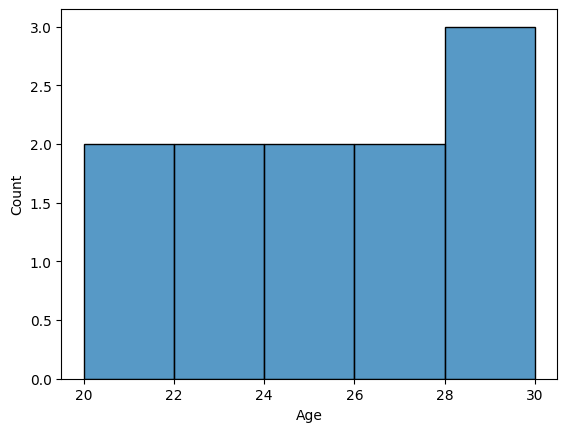

In [54]:
sns.histplot(df['Age'])

## By Using IQR

In [56]:
df 

,Age,Income,Height,z_score
0,20,1000,152,-0.938954
1,21,150000,174,-0.806396
2,22,50907,100,-0.673838
3,23,55456,250,-0.541280
4,24,64770,165,-0.408721
5,25,53755,184,-0.276163
6,26,60339,164,-0.143605
7,27,50870,171,-0.011047
8,28,64480,183,0.121512
9,29,58566,177,0.254070


### Formula
*IQR = Q3-Q1* 

In [58]:
Q1 = np.percentile(df['Age'],25 ,)
Q3 = np.percentile(df['Age'],75, )
Q1,Q3

(22.5, 27.5)

In [59]:
Q1 = np.percentile(df['Age'],25 , interpolation='midpoint')
Q3 = np.percentile(df['Age'],75, interpolation='midpoint')
Q1,Q3

(22.5, 27.5)

In [60]:
IQR = Q3-Q1

In [61]:
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

In [62]:
print(f"Here are the outliers based on the IQR threshold:\n {df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]}")

Here are the outliers based on the IQR threshold:
 Empty DataFrame
Columns: [Age, Income, Height, z_score]
Index: []


In [63]:
df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

In [64]:
df

,Age,Income,Height,z_score
0,20,1000,152,-0.938954
1,21,150000,174,-0.806396
2,22,50907,100,-0.673838
3,23,55456,250,-0.541280
4,24,64770,165,-0.408721
5,25,53755,184,-0.276163
6,26,60339,164,-0.143605
7,27,50870,171,-0.011047
8,28,64480,183,0.121512
9,29,58566,177,0.254070


## By Using  KMean clusting 

In [66]:
from sklearn.cluster import KMeans

# Sample data
data = [[2, 2], [3, 3], [3, 4], [30, 30], [31, 31], [32, 32]]

# Create a K-means model with two clusters (normal and outlier)
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(data)

# Predict cluster labels
labels = kmeans.predict(data)

# Identify outliers based on cluster labels
outliers = [data[i] for i, label in enumerate(labels) if label == 1]

# print data
print("Data:", data)
print("Outliers:", outliers)
# Remove outliers
data = [data[i] for i, label in enumerate(labels) if label == 0]
print("Data without outliers:", data)


Data: [[2, 2], [3, 3], [3, 4], [30, 30], [31, 31], [32, 32]]
Outliers: [[2, 2], [3, 3], [3, 4]]
Data without outliers: [[30, 30], [31, 31], [32, 32]]


# Merge 
there are two method 
1) pd.merge
2) concatenation pd.concat

In [68]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler ,RobustScaler

In [69]:
"""df = {
    'age': [25,30,35,40,45],
    'height': [165,170,175,180,185],
    'weight': [55,60,65,70,75]
}

# conver this data to pandas datafram
df = pd.DataFrame(df)
df.head() """

"df = {\n    'age': [25,30,35,40,45],\n    'height': [165,170,175,180,185],\n    'weight': [55,60,65,70,75]\n}\n\n# conver this data to pandas datafram\ndf = pd.DataFrame(df)\ndf.head() "

In [70]:
df

,Age,Income,Height,z_score
0,20,1000,152,-0.938954
1,21,150000,174,-0.806396
2,22,50907,100,-0.673838
3,23,55456,250,-0.541280
4,24,64770,165,-0.408721
5,25,53755,184,-0.276163
6,26,60339,164,-0.143605
7,27,50870,171,-0.011047
8,28,64480,183,0.121512
9,29,58566,177,0.254070


# Feature scaling and normalization 

Standard scaling is a method of scaling the data such that the distribution of the data is centered around 0, with a standard deviation of 1. This is done by subtracting the mean of the data from each data point and then dividing by the standard deviation of the data. This is a very common method of scaling data, and is used in many machine learning algorithms.

The formula is as follows:

z = (x - μ) / σ

In [73]:
scalar = StandardScaler()

In [74]:
standarad_df = scalar.fit_transform(df)

In [75]:
standarad_df = pd.DataFrame(standarad_df , columns= df.columns)
standarad_df

,Age,Income,Height,z_score
0,-1.581139,-1.766188,-0.540667,-1.581139
1,-1.264911,2.729639,0.113540,-1.264911
2,-0.948683,-0.260327,-2.086974,-0.948683
3,-0.632456,-0.123069,2.373528,-0.632456
4,-0.316228,0.157966,-0.154090,-0.316228
5,0.000000,-0.174394,0.410907,0.000000
6,0.316228,0.024268,-0.183827,0.316228
7,0.632456,-0.261444,0.024330,0.632456
8,0.948683,0.149215,0.381170,0.948683
9,1.264911,-0.029230,0.202750,1.264911


In [76]:
scalar = MinMaxScaler()
minmax_scalar = scalar.fit_transform(df)
minmax_scalar = pd.DataFrame(minmax_scalar,columns = df.columns)
minmax_scalar

,Age,Income,Height,z_score
0,0.0,0.000000,0.346667,0.0
1,0.1,1.000000,0.493333,0.1
2,0.2,0.334946,0.000000,0.2
3,0.3,0.365477,1.000000,0.3
4,0.4,0.427987,0.433333,0.4
5,0.5,0.354060,0.560000,0.5
6,0.6,0.398248,0.426667,0.6
7,0.7,0.334698,0.473333,0.7
8,0.8,0.426040,0.553333,0.8
9,0.9,0.386349,0.513333,0.9


In [77]:
scalar = MaxAbsScaler()
maxabs_scalar = scalar.fit_transform(df)
maxabs_scalar = pd.DataFrame(maxabs_scalar,columns=df.columns)
maxabs_scalar

,Age,Income,Height,z_score
0,0.666667,0.006667,0.608,-1.000000
1,0.700000,1.000000,0.696,-0.858824
2,0.733333,0.339380,0.400,-0.717647
3,0.766667,0.369707,1.000,-0.576471
4,0.800000,0.431800,0.660,-0.435294
5,0.833333,0.358367,0.736,-0.294118
6,0.866667,0.402260,0.656,-0.152941
7,0.900000,0.339133,0.684,-0.011765
8,0.933333,0.429867,0.732,0.129412
9,0.966667,0.390440,0.708,0.270588


In [78]:
# import the scalar
scalar = RobustScaler()

# fit the scalar on data
scaled_df = scalar.fit_transform(df)
scaled_df
# convert this data into a pandas dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,Age,Income,Height,z_score
0,-1.0,-4.726673,-0.863636,-1.0
1,-0.8,8.206232,0.136364,-0.8
2,-0.6,-0.394844,-3.227273,-0.6
3,-0.4,0.000000,3.590909,-0.4
4,-0.2,0.808437,-0.272727,-0.2


## Transformation 


In [80]:
np.random.seed(0)
df1 = np.random.exponential(size = 1000, scale = 2 )
df1 = pd.DataFrame(df1, columns = ['Values'])

In [81]:

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

pt_boxcox = PowerTransformer(method='box-cox', standardize=False)
pt_yeo_johnson = PowerTransformer(method='yeo-johnson', standardize=False)
qt_normal = QuantileTransformer(output_distribution='normal')

# boxbcox k liay data must be postive
df1['Box_Cox'] = pt_boxcox.fit_transform(df1[['Values']]+ 1 )
df1['Yeo_Johnson'] = pt_yeo_johnson.fit_transform(df1[['Values']])
df1['Quantile'] = qt_normal.fit_transform(df1[['Values']])


In [82]:
df1

,Values,Box_Cox,Yeo_Johnson,Quantile
0,1.591749,0.787485,0.787485,0.162552
1,2.511862,0.980233,0.980233,0.587964
2,1.846446,0.849553,0.849553,0.286135
3,1.574402,0.782945,0.782945,0.157469
4,1.102097,0.639848,0.639848,-0.154930
...,...,...,...,...
995,0.205564,0.179918,0.179918,-1.315958
996,1.446892,0.748196,0.748196,0.074087
997,5.574577,1.309242,1.309242,1.475269
998,0.519217,0.384099,0.384099,-0.748009


In [83]:
import matplotlib.pyplot as plt

In [84]:
df1.columns

Index(['Values', 'Box_Cox', 'Yeo_Johnson', 'Quantile'], dtype='object')

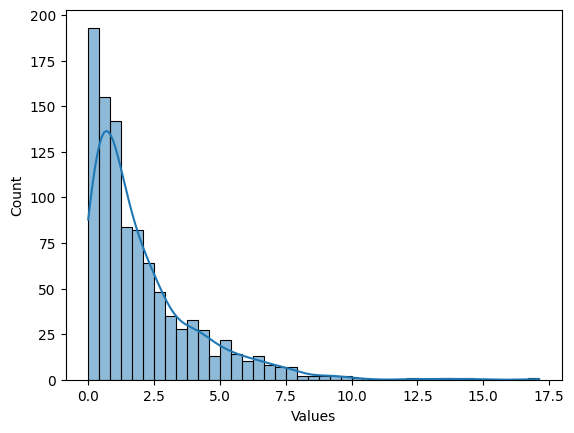

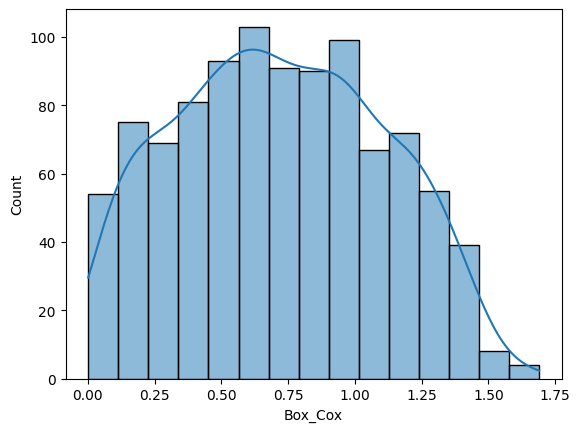

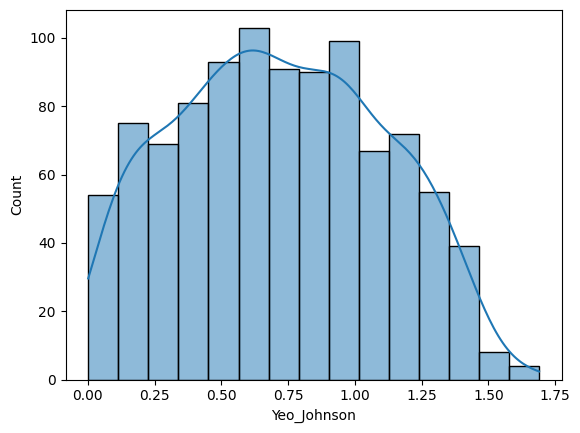

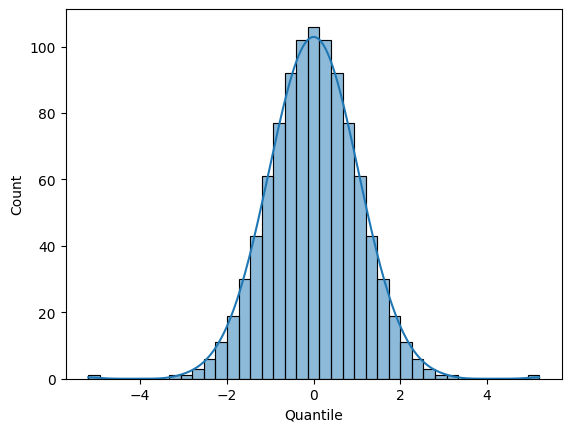

In [85]:
for col in df1.columns:
    sns.histplot(df1[col], kde= True )
    plt.show()

### Normalization: 

there are two types of L1 and L2 Normalization 

L1 Normalization:

Also rescales each sample (row) but with a different approach, ensuring the sum of the absolute values is 1 in each row. The L1 norm is calculated as the sum of the absolute vector values.

L2 Normalization:

Rescales each sample (row) to have unit norm. This type of normalization is often used when dealing with text data. The L2 norm is calculated as the square root of the sum of the squared vector values.


In [87]:
from sklearn.preprocessing import Normalizer

In [88]:
normalizer = Normalizer(norm= 'l1')
normalizer_data = normalizer.fit_transform(df1)
normalizer_data

array([[ 0.47810741,  0.23653368,  0.23653368,  0.04882523],
       [ 0.49638672,  0.1937108 ,  0.19371079,  0.11619169],
       [ 0.48188862,  0.22171771,  0.2217177 ,  0.07467597],
       ...,
       [ 0.57658118,  0.1354155 ,  0.1354155 ,  0.15258781],
       [ 0.25509024,  0.18870719,  0.18870718, -0.36749539],
       [ 0.49167279,  0.20341032,  0.20341032,  0.10150656]])

In [89]:
normalizer = Normalizer(norm= 'l2')
normalizer_data = normalizer.fit_transform(df1)
normalizer_data

array([[ 0.81651216,  0.40395238,  0.40395238,  0.08338375],
       [ 0.85769216,  0.33470725,  0.33470724,  0.20076425],
       [ 0.83120003,  0.38243643,  0.38243643,  0.12880709],
       ...,
       [ 0.92043678,  0.21617322,  0.21617321,  0.24358658],
       [ 0.48970347,  0.36226616,  0.36226616, -0.70549059],
       [ 0.8497384 ,  0.35154592,  0.35154591,  0.17542973]])

In [90]:
log_data = np.log(df1)
log_data

/home/mebi/anaconda3/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,Values,Box_Cox,Yeo_Johnson,Quantile
0,0.464833,-0.238911,-0.238911,-1.816755
1,0.921024,-0.019965,-0.019965,-0.531090
2,0.613263,-0.163045,-0.163045,-1.251292
3,0.453876,-0.244693,-0.244693,-1.848524
4,0.097215,-0.446525,-0.446525,NaN
...,...,...,...,...
995,-1.581998,-1.715253,-1.715253,NaN
996,0.369418,-0.290090,-0.290090,-2.602511
997,1.718216,0.269448,0.269448,0.388841
998,-0.655433,-0.956854,-0.956854,NaN


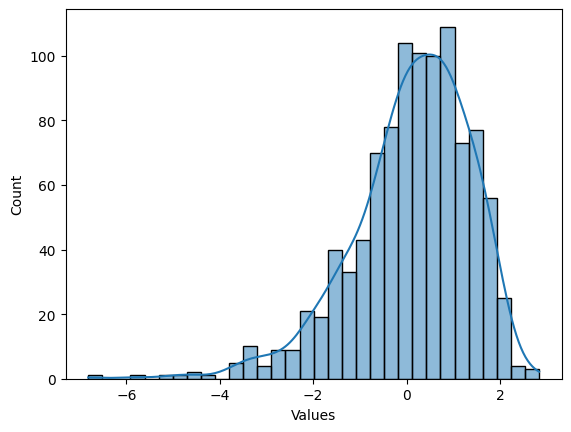

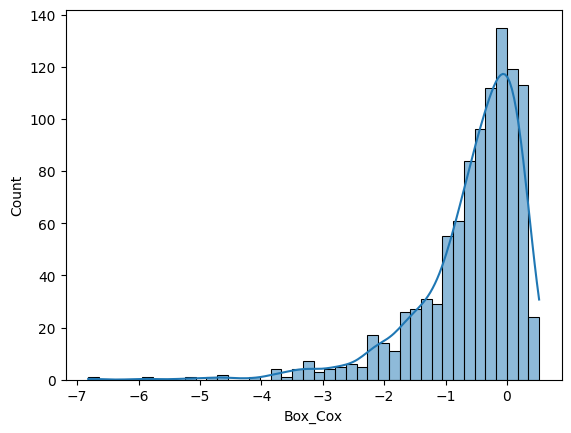

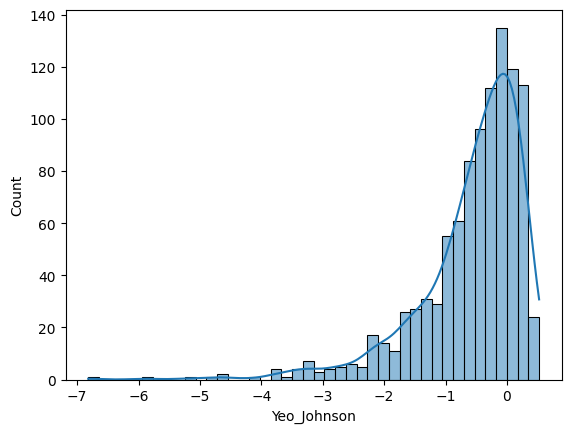

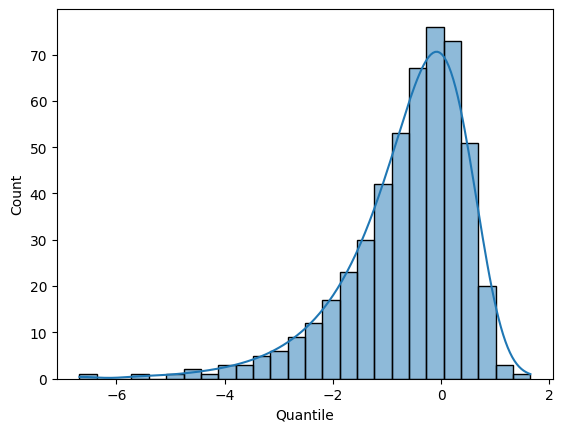

In [91]:
for col in log_data.columns:
    sns.histplot(log_data[col], kde= True)
    plt.show()

In [92]:
df1

,Values,Box_Cox,Yeo_Johnson,Quantile
0,1.591749,0.787485,0.787485,0.162552
1,2.511862,0.980233,0.980233,0.587964
2,1.846446,0.849553,0.849553,0.286135
3,1.574402,0.782945,0.782945,0.157469
4,1.102097,0.639848,0.639848,-0.154930
...,...,...,...,...
995,0.205564,0.179918,0.179918,-1.315958
996,1.446892,0.748196,0.748196,0.074087
997,5.574577,1.309242,1.309242,1.475269
998,0.519217,0.384099,0.384099,-0.748009


# Feature Encoding 

In [94]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import  OneHotEncoder, LabelEncoder, OrdinalEncoder

In [95]:
df = sns.load_dataset('tips')

In [96]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [97]:
df['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [98]:
le = LabelEncoder()

In [99]:
df['encoded_time'] = le.fit_transform(df['time'])

In [100]:
df.encoded_time.value_counts()

encoded_time
0    176
1     68
Name: count, dtype: int64

In [101]:
oe = OrdinalEncoder(categories=[['Thur', 'Fri', 'Sat', 'Sun']])
df['encoded_day'] = oe.fit_transform(df[['day']])
df.head()

,total_bill,tip,sex,smoker,day,time,size,encoded_time,encoded_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,3.0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3,0,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2,0,3.0
4,24.59,3.61,Female,No,Sun,Dinner,4,0,3.0


In [102]:
ohe = OneHotEncoder()
ohe.fit_transform(df[['sex']]).toarray()

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.

## Feature encoding with pd 

In [199]:
pd.get_dummies(df,columns=['smoker']

,total_bill,tip,sex,day,time,size,encoded_time,encoded_day,smoker_Yes,smoker_No
0,16.99,1.01,Female,Sun,Dinner,2,0,3.0,False,True
1,10.34,1.66,Male,Sun,Dinner,3,0,3.0,False,True
2,21.01,3.50,Male,Sun,Dinner,3,0,3.0,False,True
3,23.68,3.31,Male,Sun,Dinner,2,0,3.0,False,True
4,24.59,3.61,Female,Sun,Dinner,4,0,3.0,False,True
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,Sat,Dinner,3,0,2.0,False,True
240,27.18,2.00,Female,Sat,Dinner,2,0,2.0,True,False
241,22.67,2.00,Male,Sat,Dinner,2,0,2.0,True,False
242,17.82,1.75,Male,Sat,Dinner,2,0,2.0,False,True



## Discretization

Data discretization is a preprocessing technique used to transform continuous or numerical data into discrete categories or bins. This process can be particularly useful for machine learning algorithms that handle categorical data more effectively than continuous data. It can also help to improve model interpretability and handle outliers more robustly.


In [202]:


import pandas as pd
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer


df = sns.load_dataset('titanic')
df.head()




,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [204]:


# impute missing values
df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())



<Axes: xlabel='age', ylabel='Count'>

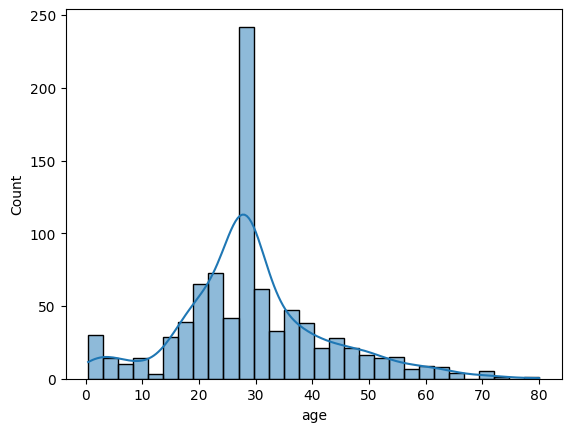

In [206]:


sns.histplot(df['age'], kde=True)



In [208]:
age_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
df['age_bin'] = age_discretizer.fit_transform(df[['age']])
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_bin
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1.0


<Axes: xlabel='age', ylabel='Count'>

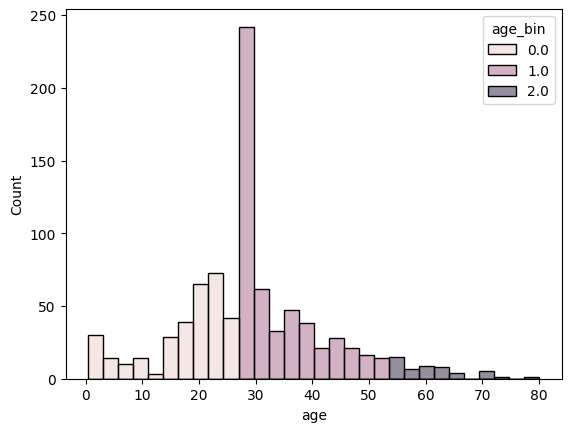

In [210]:


sns.histplot(df, x='age', hue = 'age_bin')



<Axes: xlabel='age', ylabel='Count'>

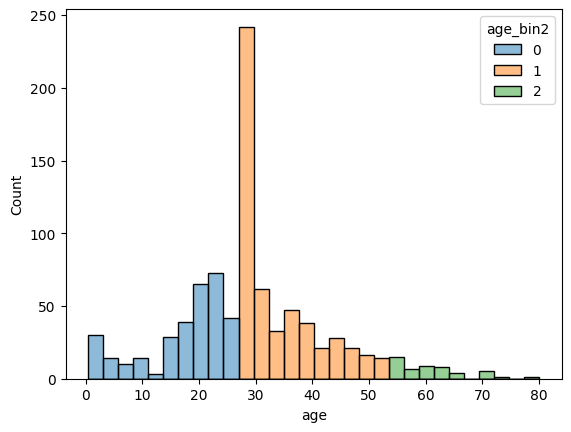

In [212]:


# pandas method for manual binning
df['age_bin2'] = pd.cut(df['age'], bins=3, labels=[0,1,2])
sns.histplot(df, x='age', hue = 'age_bin2')



<Axes: xlabel='age', ylabel='Count'>

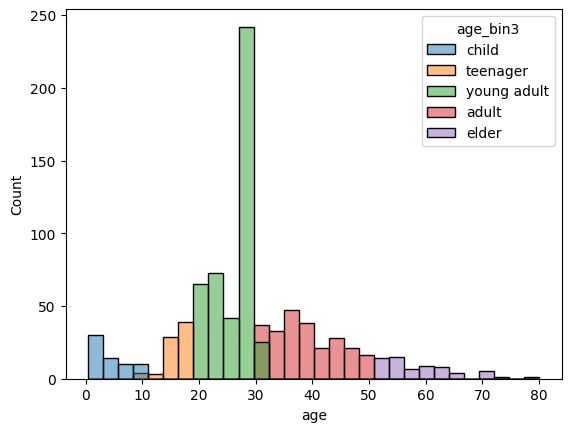

In [214]:



# define the bins
bins = [0, 10, 18, 30, 50, 80]
labels = ['child', 'teenager', 'young adult', 'adult', 'elder']
df['age_bin3'] = pd.cut(df['age'], bins=bins, labels=labels)
sns.histplot(df, x='age', hue = 'age_bin3')

